In [1]:
import ROOT as R
R.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.22/00


In [2]:
import os
import math

In [3]:
DIR_IN = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/trk_eff/'
# FILES_IN = [os.path.join(DIR_IN, name) for name in ['trk_eff_r2_5.root', 
#                                                     'trk_eff_r2_5_DL.root',
#                                                     'trk_eff_r2_5_DLe.root']]
# FILES_IN = [os.path.join(DIR_IN, name) for name in ['pgun_mu_1per10k_6pt_False_v0_Ct4Time_j{0:d}.root'.format(j) for j in range(1,5) ]]
# FILES_IN = [os.path.join(DIR_IN, name) for name in ['pgun_mu_1per10k_6ptFalse_v0_Ct3Time{0:s}_j2.root'.format(t) for t in ['', 'Split'] ]]
FILES_IN = [os.path.join(DIR_IN, name) for name in ['pgun_mu_1per10k_6ptFalse_{0:s}_j2.root'.format(t) for t in ['v1_OldCtTime', 'v1_Ct5TimeSplit_timing', 'v1_Ct7TimeSplit', 'v2_Ct6TimeSplit_allSeed_looser'] ]]
# FILES_IN = [os.path.join(DIR_IN, name) for name in ['pgun_mu_1kper10_6ptFalse_v2_{0:s}_j2.root'.format(t) for t in ['OldCtTime', 'Ct7TimeSplit'] ]]


### Getting track Theta distributions

In [82]:
histos = {}
hnames = ['h_mcp_abstheta', 'h_mcp_abstheta_reco', 'p_trk_theta_pt', 'h_mcp_pt']
for iF, file_in in enumerate(FILES_IN):
    hs = {}
    fIn = R.TFile(file_in)
    for hname in hnames:
        h = fIn.Get(hname).Clone()
        h.SetDirectory(0)
        R.SetOwnership(h, False)
        hs[hname] = h
    histos[iF] = hs
    fIn.Close()

### Calculating efficiency histograms

MCP pT: 0.5 GeV
MCP pT: 0.5 GeV
MCP pT: 0.5 GeV
MCP pT: 0.5 GeV


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TROOT::Append>: Replacing existing TH1: h_axis (Potential memory leak).


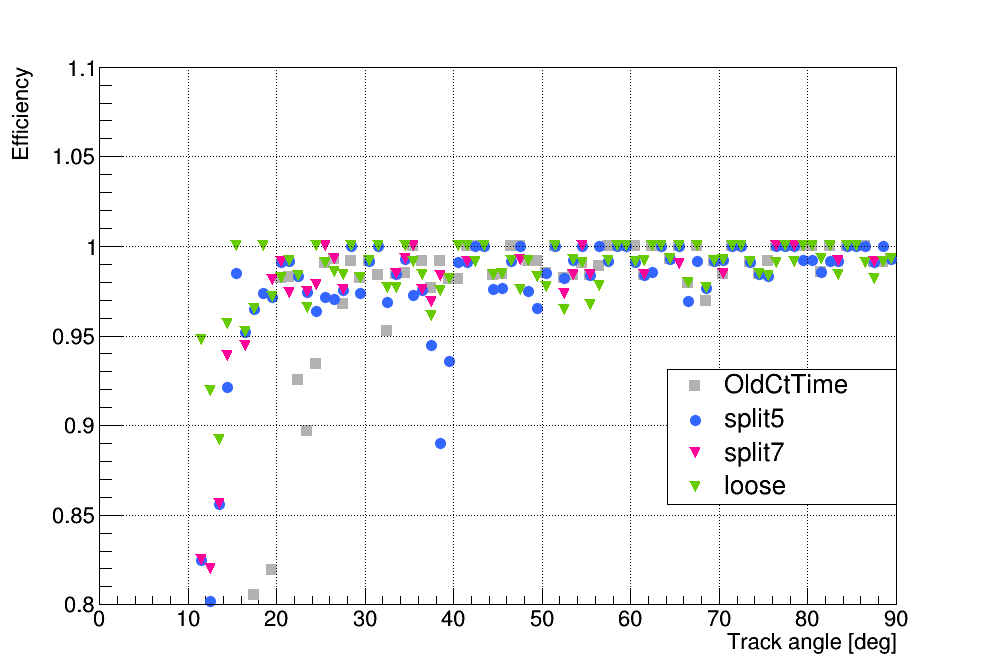

In [83]:
C = R.TCanvas('canvas', '', 1000, 700)
C.SetGrid(1,1)
leg = R.TLegend(0.67,0.25, 0.9,0.45)
# legends = ['Seed: L1-8', 'Seed: L3-8']
# legends = ['OldCtTime', 'split7 ALL']
legends = ['OldCtTime', 'split5', 'split7', 'loose']
# legends = ['split6 ALL loose', 'split7 DL', 'split7 ALL', 'split7 DLe']
# legends = ['time', 'time + DL', 'time + DL - edges']
# legends = ['p_{{T}} = {0:.1f} GeV'.format(pt) for pt in [0.1, 0.5, 1.0, 10]]
# legends = ['p_{{T}} = {0:.1f} GeV'.format(pt) for pt in [0.1, 0.2, 0.4, 0.7]]
# legends = ['p_{{T}} = {0:.1f} GeV'.format(pt) for pt in [1, 2, 10, 100]]
ha = R.TH1F('h_axis', ';Track angle [deg];Efficiency', 1, 0, 90)
ha.SetAxisRange(0.8, 1.1, 'Y')
ha.Draw('AXIS')
markers = [21, 20, 23, 23, 23]
colors = [16, R.kAzure-2, R.kPink+7, R.kSpring-8, R.kOrange+2]
for run, legend in enumerate(legends):
    hs = histos[run]
    # Getting the true Pt
    pt = hs['h_mcp_pt'].GetMean()
    print('MCP pT: {0:.1f} GeV'.format(pt))
    # Getting the theta distribution
    h = hs['h_mcp_abstheta_reco'].Clone()
    h.SetDirectory(0)
    R.SetOwnership(h, False)
    h.Divide(hs['h_mcp_abstheta_reco'], hs['h_mcp_abstheta'])
    h.SetMarkerStyle(markers[run])
    h.SetMarkerSize(1.4)
    h.SetMarkerColor(colors[run])
    h.Draw('sameP')
    leg.AddEntry(h, legend, 'p')
ha.Draw('AXIG same')
leg.Draw()
C.Draw()
DIR_OUT = '/Users/nbartosi/cernbox/work/mu_collider/data/plots/'
# C.SaveAs(os.path.join(DIR_OUT, 'trk_eff_mod4_pt0p5_split.png'))

### Calculating Pt resolution histograms

1.2292007091767196
0.8709703580874026
1.3552465638754274
1.199571601026413
1.2037924857471802
1.2857571854117906
1.625386936245852
1.6638481057186412
1.748503432180977
1.5172837965747954
1.6111072030307692
1.4499870334627272
1.5276347538151844
1.3956270351200526
2.0854289851380385
2.055889205539892
1.905509451044375
1.9630530901256862
1.976314304713081
1.2456959683849613
3.4156010015538514
3.643373364440024
3.8908619971263705
4.170130015234616
7.193341038361228
5.222515549155376
3.343178258836906
2.4043521262799312
7.725169984196056
11.596902666110708
12.579103900333862
12.8152125948132


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas2
Warning in <TROOT::Append>: Replacing existing TH1: h_axis (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/nbartosi/cernbox/work/mu_collider/data/plots/trk_ptres_mod5_j5-8.png has been created


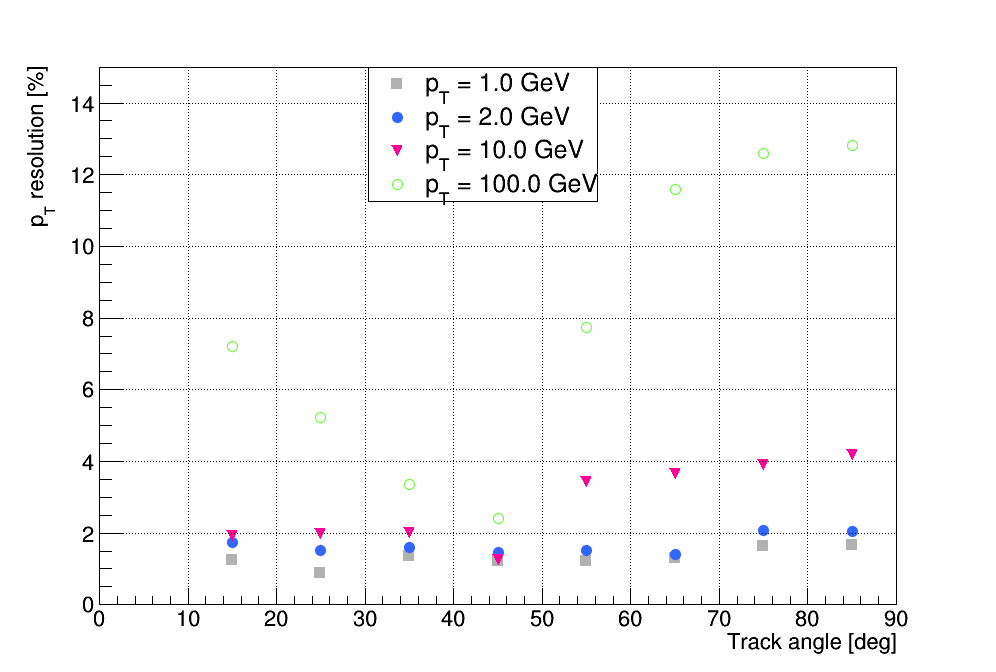

In [101]:
C = R.TCanvas('canvas2', '', 1000, 700)
C.SetGrid(1,1)
# leg = R.TLegend(0.67,0.45, 0.9,0.65)
# leg = R.TLegend(0.67,0.7, 0.9,0.9)
leg = R.TLegend(0.37,0.7, 0.6,0.9)
# legends = ['time', 'time + DL', 'time + DL - edges']
# legends = ['p_{{T}} = {0:.1f} GeV'.format(pt) for pt in [0.1, 0.2, 0.4, 0.7]]
legends = ['p_{{T}} = {0:.1f} GeV'.format(pt) for pt in [1, 2, 10, 100]]
ha = R.TH1F('h_axis', ';Track angle [deg];p_{T} resolution [%]', 1, 0, 90)
# ha.SetAxisRange(0, 4.0, 'Y')
ha.SetAxisRange(0, 15.0, 'Y')
ha.Draw('AXIS')
markers = [21, 20, 23, 24]
colors = [16, R.kAzure-2, R.kPink+7, R.kSpring-2]
for run, legend in enumerate(legends):
    hs = histos[run]
    h = hs['p_trk_theta_pt'].ProjectionX()
    h.SetDirectory(0)
    R.SetOwnership(h, False)
    for iB in range(1, h.GetNbinsX()+1):
        if h.GetBinContent(iB) == 0:
            continue
        perc = h.GetBinError(iB)/h.GetBinContent(iB)*100.0
        print(perc)
        h.SetBinError(iB, 0)
        h.SetBinContent(iB, perc)
    h.SetMarkerStyle(markers[run])
    h.SetMarkerSize(1.4)
    h.SetMarkerColor(colors[run])
    h.Draw('sameP')
    leg.AddEntry(h, legend, 'p')
ha.Draw('AXIG same')
leg.Draw()
C.Draw()
DIR_OUT = '/Users/nbartosi/cernbox/work/mu_collider/data/plots/'
C.SaveAs(os.path.join(DIR_OUT, 'trk_ptres_mod5_j5-8.png'))

### Number of hits per layer

In [3]:
DIR_IN = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_11_11_tracking/digi'
# FILES_IN = [os.path.join(DIR_IN, name) for name in ['pgun_mu_100_6ptBIBTrimmed_v1_hitdensity_{0:s}.root'.format(t) for t in ['all', 'DL', 'DLe'] ]]
# FILES_IN = ['/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_10_15_geometry/digi/bib_trkFalse_v0_hit_density.root',
#             '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_10_15_geometry/digi/bib_trk_mod5False_v0_hit_density.root',
#             '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_10_15_geometry/digi/bib_trk_mod5False_v1_hit_density.root']
FILES_IN = [os.path.join(DIR_IN, f) for f in [
    'pgun_mu_1per10k_6pBIBTrimmed_dPhiCut_j3_hitMult.root',
    'pgun_mu_1per10k_6pBIBTrimmed_dPhiCut_j3_hitMult_DL.root',
    'pgun_mu_1per10k_6pBIBTrimmed_dPhiCut_j3_hitMult_DL2.root'
]]

In [5]:
histos = {}
hnames = ['h_nhits_sum', 'h_nhits_max', 'h_nhits_median']
for iF, file_in in enumerate(FILES_IN):
    hs = {}
    fIn = R.TFile(file_in)
    for hname in hnames:
        h = fIn.Get(hname).Clone()
        h.SetDirectory(0)
        R.SetOwnership(h, False)
        hs[hname] = h
    histos[iF] = hs
    fIn.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h_axis (Potential memory leak).
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_11_11_tracking/plots/hit_mult_dl4.pdf has been created


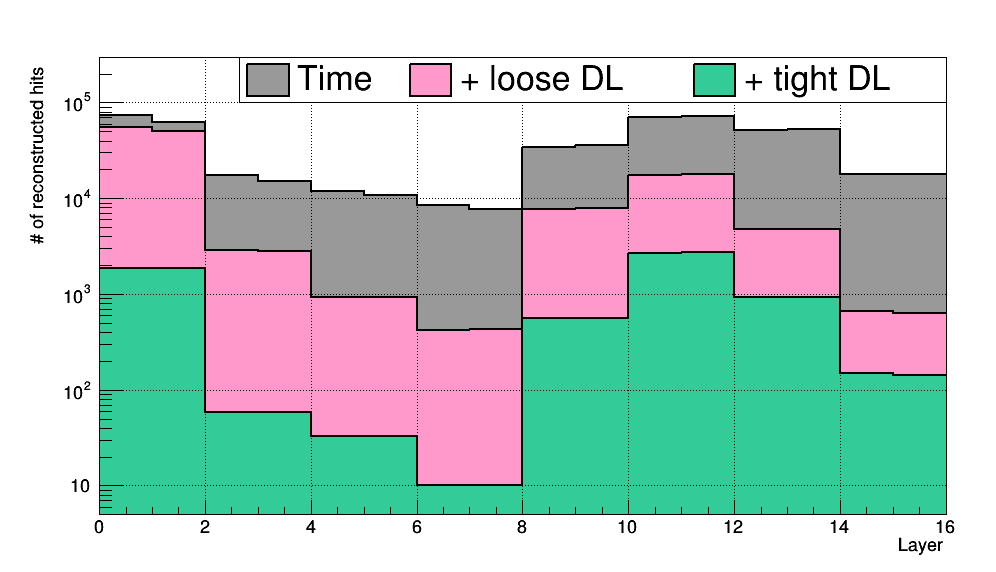

In [19]:
colors = [14, R.kAzure-2, R.kPink+7, R.kSpring+7]
R.gStyle.SetOptStat(0)
C = R.TCanvas('c1', '', 1000,600)
C.SetLeftMargin(0.1)
C.SetRightMargin(0.05)
C.SetGrid(1,1)
C.SetLogy(True)
# leg = R.TLegend(0.63,0.72,0.9,0.9)
leg = R.TLegend(0.24,0.82,0.95,0.9)
leg.SetNColumns(3)
# ha = R.TH1F('h_axis', ';Layer;N reco hits (total)', 1, 0, 33)
ha = R.TH1F('h_axis', ';Layer;# of reconstructed hits', 1, 0, 16)
ha.SetAxisRange(5, 3e5, 'Y')
ha.Draw('AXIS')
legends = ['Time', '+ loose DL', '+ tight DL']
colors = [14, 2, R.kSpring-8, R.kPink-2]
fillColors = [R.kGray+1, R.kPink+1, R.kTeal-5]
# legends = ['All hits', 'DL filtered']
for iH, name in enumerate(legends):
    h = histos[iH]['h_nhits_sum'].Clone()
    h.SetDirectory(0)
    R.SetOwnership(h, False)
    h.SetLineColor(1)
    h.SetFillColor(fillColors[iH])
    h.SetLineWidth(2)
    leg.AddEntry(h, legends[iH], 'f')
    h.Draw('HIST same')
ha.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
C.SaveAs('/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_11_11_tracking/plots/hit_mult_dl4.pdf')
# DIR_OUT = '/Users/nbartosi/cernbox/work/mu_collider/data/plots/'
# C.SaveAs(os.path.join(DIR_OUT, 'hit_mult_trk_mods.png'))

In [15]:
colors = {25: R.kGray+2, 50: R.kPink-4, 100: R.kAzure+1, 200: R.kSpring-6}
C = R.TCanvas('c2', '', 800,800)
C.SetLeftMargin(0.15)
C.SetGrid(1,1)
R.gStyle.SetOptStat(0)
C.Clear()
leg = R.TLegend(0.3,0.8,0.9,0.9)
leg.SetNColumns(2)
h_ax = None
for iH, pitch in enumerate([25,50,100,200]):
    h = h_occup[pitch]
    if iH == 0:
        h_ax = h
        h.SetAxisRange(0.01, 50, 'Y')
    drawopt = '' if iH == 0 else 'same'
    h.SetLineColor(colors[pitch])
    h.SetLineWidth(2)
    h.Draw(drawopt)
    leg.AddEntry(h, '{0:d} #times {0:d} #mum^{{2}}'.format(pitch), 'L')
h_ax.Draw("AXIG same")
# Drawing line
line = R.TLine(8,0,8,10)
line.SetLineColor(1)
line.SetLineWidth(2)
line.Draw()
# Drawing text
tb = R.TText(4, 2e-2, 'VTX Barrel')
tb.SetTextAlign(22)
tb.SetTextColor(R.kGray+1)
tb.Draw()
te = R.TText(12, 2e-2, 'VTX Endcap')
te.SetTextAlign(22)
te.SetTextColor(R.kPink+1)
te.Draw()
leg.Draw()
C.SetLogy()
C.Draw()
C.SaveAs(os.path.join(DIR_IN, 'plots/sensor_occupancy_vtx.pdf'))

NameError: name 'h_occup' is not defined

In [201]:
1.0/(50*50*1e-8)

40000.0